In [153]:
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')  # modern grid + soft colors
class Option:
    ### Option Class to compute the value of vanilla Put and Call European Options
    def __init__(self,S,K,T,sig,r):

        self.S = S
        self.K = K
        self.T = T
        self.sig = sig
        self.r = r

    def d1(self):
        return (np.log(self.S/self.K)+(self.r+(self.sig**2)/2)*self.T)/(self.sig*np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sig*np.sqrt(self.T)

    def call_price(self):
        return self.S*norm.cdf(self.d1()) - self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2())

    def put_price(self):
        return self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2()) - self.S*norm.cdf(-self.d1())

    # Greek Section
    #1. Delta
    def call_delta(self):
        return norm.cdf(self.d1())

    def put_delta(self):
        return -norm.cdf(-self.d1())
    #2. Gamma (Gamma put = gamma call)
    def gamma_option(self):
      return norm.pdf(self.d1())/(self.S*self.sig*np.sqrt(self.T))

    #3. Vega
    def vega_option(self):
      return self.S*np.sqrt(self.T)*norm.pdf(self.d1())

    #4. Theta
    def call_theta(self):
      return -self.S*self.sig*norm.pdf(self.d1())/(2*np.sqrt(self.T)) - self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(self.d2())

    def put_theta(self):
      return -self.S*self.sig*norm.pdf(self.d1())/(2*np.sqrt(self.T)) + self.r*self.K*np.exp(-self.r*self.T)*norm.cdf(-self.d2())

    #5 Rho
    def call_rho(self):
      return (self.K*self.T*np.exp(-self.r*self.T)*norm.cdf(self.d2()))

    def put_rho(self):
      return self.K*self.T*np.exp(-self.r*self.T)*(norm.cdf(self.d2())-1)


first_try = Option(100, 100, 0.25, 0.2, 0.03)

first_try.call_delta()

np.float64(0.5497382248301129)

In [149]:
class GreekGraph(Option):
  #2d Graphs
  def graph_all_call_greeks_v_spot(self):
    S = np.linspace(0.6*self.S, 1.4*self.S, 100)
    delta=[]
    gamma=[]
    vega=[]
    theta=[]
    rho=[]
    for s in S:
      opt = Option(s, self.K, self.T, self.sig, self.r)
      delta.append(opt.call_delta())
      gamma.append(opt.gamma_option())
      vega.append(opt.vega_option())
      theta.append(opt.call_theta())
      rho.append(opt.call_rho())
    fig, axs = plt.subplots(5,1, figsize=(10,18), sharex=False)

    axs[0].plot(S, delta, linewidth=1, color='royalblue')
    axs[0].set_title('Delta of call option', fontsize=16, fontweight='bold')
    axs[0].set_ylabel('Delta')
    axs[0].grid(True)
    axs[0].set_xlabel('Spot Price')

    axs[1].plot(S, gamma, linewidth=1, color='royalblue')
    axs[1].set_title('Gamma of call option', fontsize=16, fontweight='bold')
    axs[1].set_ylabel('Gamma')
    axs[1].grid(True)
    axs[1].set_xlabel('Spot Price')

    axs[2].plot(S, vega, linewidth=1, color='royalblue')
    axs[2].set_title('Vega of call option', fontsize=16, fontweight='bold')
    axs[2].set_ylabel('Vega')
    axs[2].grid(True)
    axs[2].set_xlabel('Spot Price')

    axs[3].plot(S, theta, linewidth=1, color='royalblue')
    axs[3].set_title('Theta of call option', fontsize=16, fontweight='bold')
    axs[3].set_ylabel('Theta')
    axs[3].grid(True)
    axs[3].set_xlabel('Spot Price')

    axs[4].plot(S, rho, linewidth=1, color='royalblue')
    axs[4].set_title('Rho of call option', fontsize=16, fontweight='bold')
    axs[4].set_ylabel('Rho')
    axs[4].grid(True)
    axs[4].set_xlabel('Spot Price')

    for ax in axs:
        ax.axvline(self.K, color='black', linestyle='--', linewidth=1, label='ATM (S=K)')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

  def graph_all_put_greeks_v_spot(self):
      S = np.linspace(0.6*self.S, 1.4*self.S, 100)
      delta=[]
      gamma=[]
      vega=[]
      theta=[]
      rho=[]
      for s in S:
        opt = Option(s, self.K, self.T, self.sig, self.r)
        delta.append(opt.put_delta())
        gamma.append(opt.gamma_option())
        vega.append(opt.vega_option())
        theta.append(opt.put_theta())
        rho.append(opt.put_rho())
      fig, axs = plt.subplots(5,1, figsize=(10,18), sharex=False)

      axs[0].plot(S, delta, linewidth=1, color='royalblue')
      axs[0].set_title('Delta of Put option', fontsize=16, fontweight='bold')
      axs[0].set_ylabel('Delta')
      axs[0].grid(True)
      axs[0].set_xlabel('Spot Price')

      axs[1].plot(S, gamma, linewidth=1, color='royalblue')
      axs[1].set_title('Gamma of Put option', fontsize=16, fontweight='bold')
      axs[1].set_ylabel('Gamma')
      axs[1].grid(True)
      axs[1].set_xlabel('Spot Price')

      axs[2].plot(S, vega, linewidth=1, color='royalblue')
      axs[2].set_title('Vega of Put option', fontsize=16, fontweight='bold')
      axs[2].set_ylabel('Vega')
      axs[2].grid(True)
      axs[2].set_xlabel('Spot Price')

      axs[3].plot(S, theta, linewidth=1, color='royalblue')
      axs[3].set_title('Theta of Put option', fontsize=16, fontweight='bold')
      axs[3].set_ylabel('Theta')
      axs[3].grid(True)
      axs[3].set_xlabel('Spot Price')

      axs[4].plot(S, rho, linewidth=1, color='royalblue')
      axs[4].set_title('Rho of Put option', fontsize=16, fontweight='bold')
      axs[4].set_ylabel('Rho')
      axs[4].grid(True)
      axs[4].set_xlabel('Spot Price')

      for ax in axs:
          ax.axvline(self.K, color='black', linestyle='--', linewidth=1, label='ATM (S=K)')

      plt.tight_layout(rect=[0, 0, 1, 0.96])
      plt.show()


  #Surface Graphs
  def graph_gamma_surface(self):
    S = np.linspace(0.9*self.S, 1.1*self.S, 50)
    T = np.linspace(1e-8, self.T, 50)
    S,T = np.meshgrid(S,T)
    gamma= np.zeros_like(S)
    for s in range(S.shape[0]):
      for t in range(T.shape[0]):
        s_val = S[s,t]
        t_val = T[s,t]
        opt = Option(s_val, self.K, t_val, self.sig, self.r)
        gamma[s,t]= opt.gamma_option()
    fig = go.Figure(data=[go.Surface(z=gamma, x=S, y=T, colorscale='Viridis')])
    fig.update_layout(title='Gamma Surface', autosize=True, scene=dict(
        xaxis_title = 'Spot Price',
        yaxis_title = 'Time to Maturity',
        zaxis_title = 'Gamma'
    ))
    fig.show()

  def graph_vega_surface(self):
      S = np.linspace(0.7*self.S, 1.3*self.S, 50)
      T = np.linspace(1e-8, self.T, 50)
      S,T = np.meshgrid(S,T)
      vega= np.zeros_like(S)
      for s in range(S.shape[0]):
        for t in range(T.shape[0]):
          s_val = S[s,t]
          t_val = T[s,t]
          opt= Option(s_val, self.K, t_val, self.sig, self.r)
          vega[s,t] = opt.vega_option()
      fig = go.Figure(data=[go.Surface(z=vega, x=S, y=T)])
      fig.update_layout(title='Vega Surface', scene=dict(xaxis_title='Spot',yaxis_title='Time To Maturity', zaxis_title='Vega'))
      fig.show()


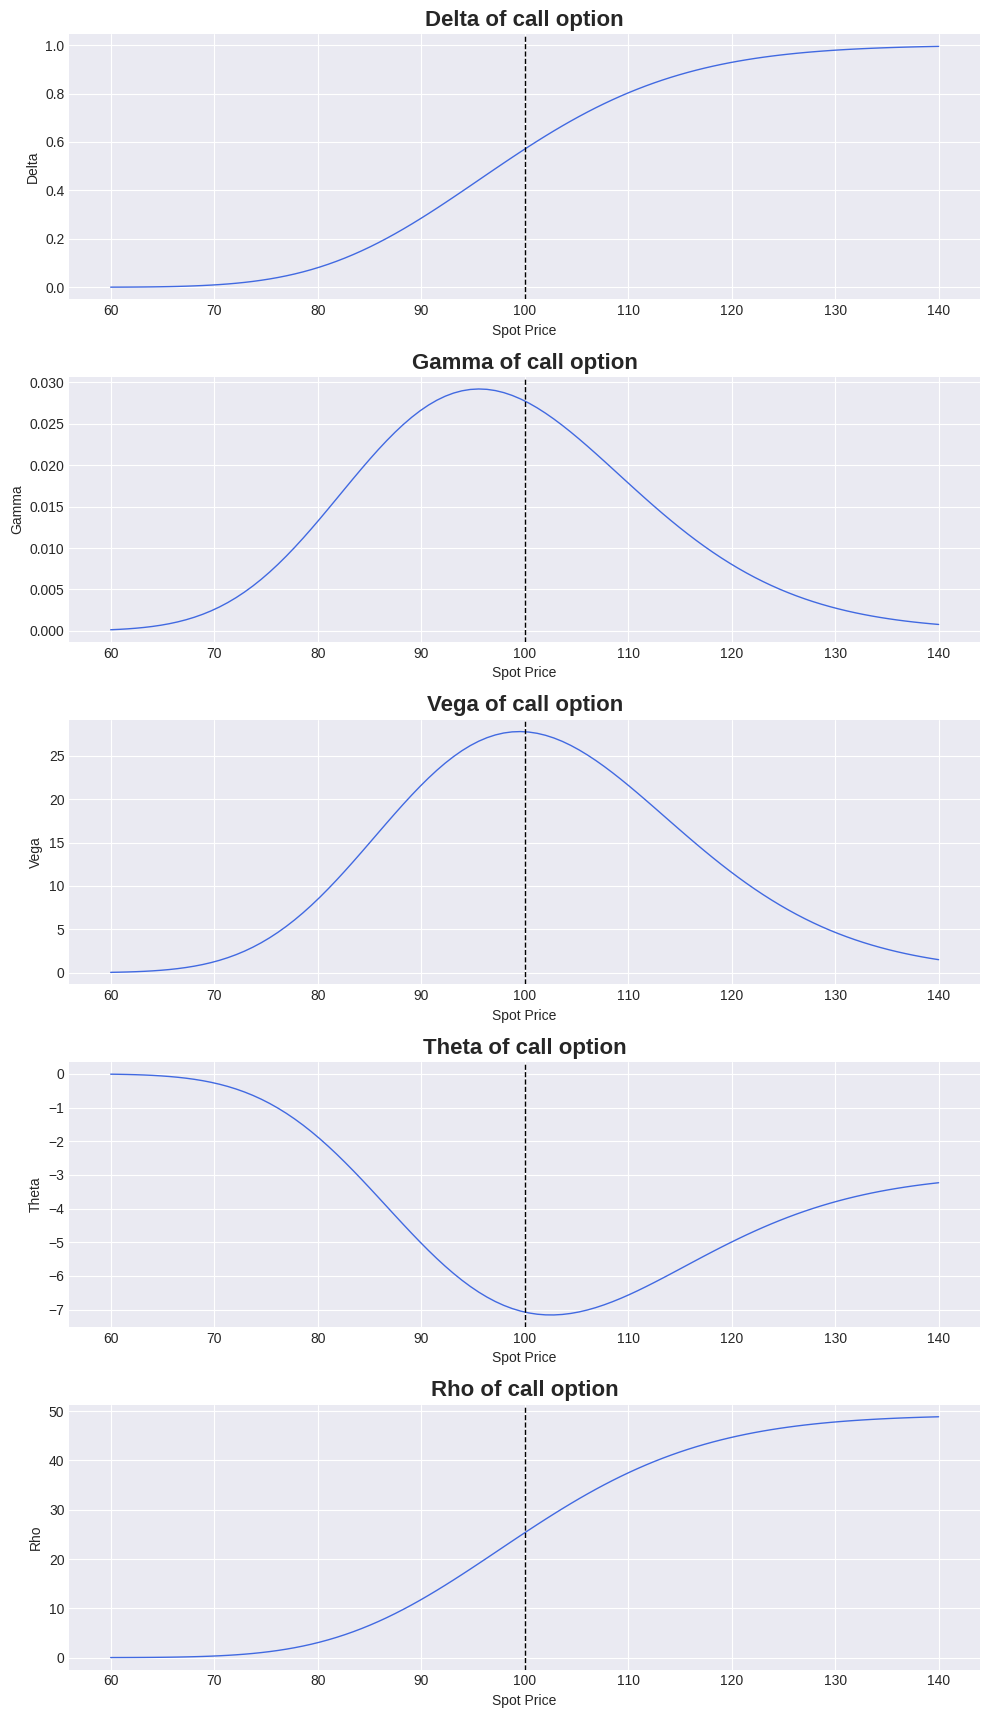

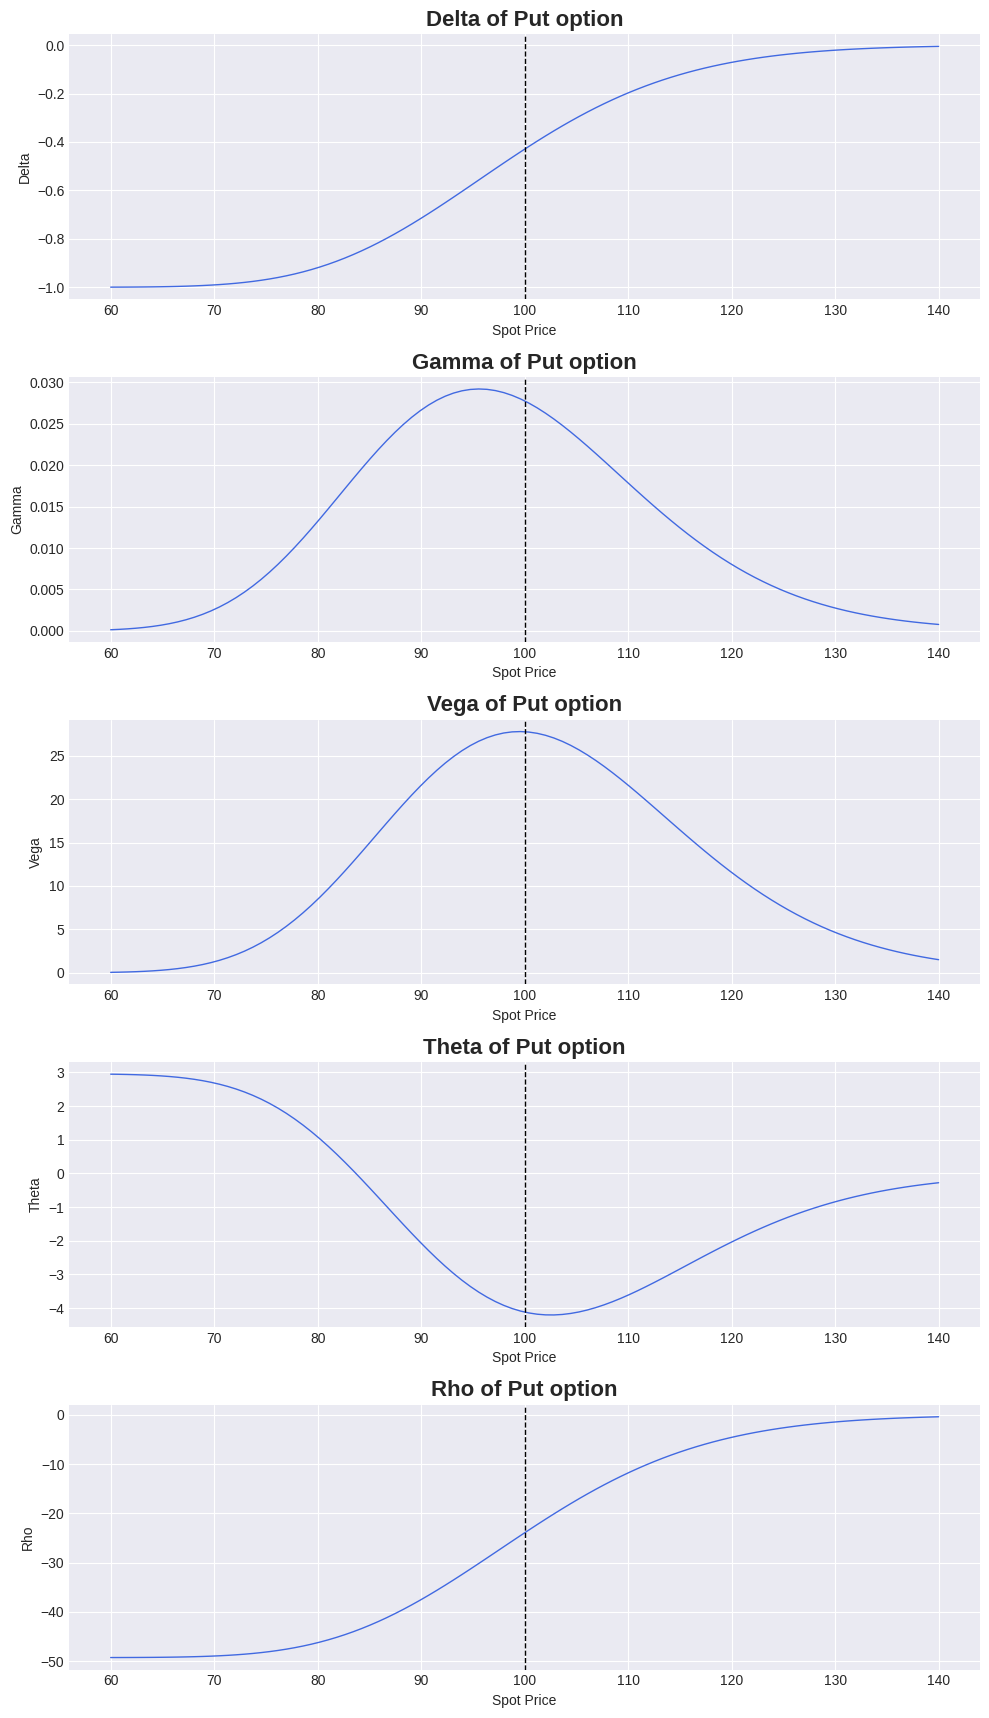

(None, None)

In [150]:
option = GreekGraph(100, 100, 0.5, 0.2, 0.03)
option.graph_all_call_greeks_v_spot(), option.graph_all_put_greeks_v_spot()

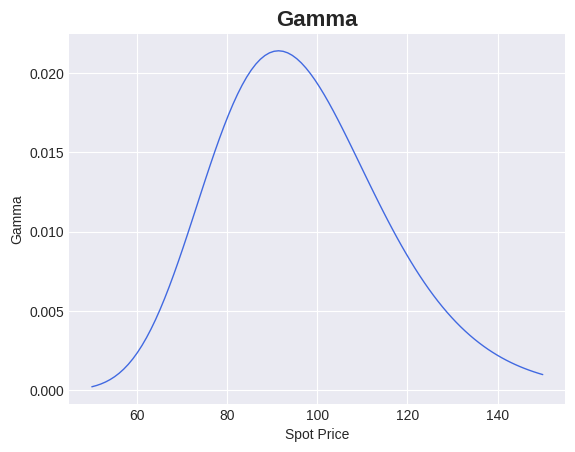

In [138]:
def graph_gamma_spot(S, K, T, sig, r):
    S = np.linspace(0.5*S, 1.5*S, 100)
    gamma = []
    for s in S:
      d1 = (np.log(s/K)+(r+(sig**2)/2)*T)/(sig*np.sqrt(T))
      d2 = d1 - sig*np.sqrt(T)
      gamma.append(norm.pdf(d1)/(s*sig*np.sqrt(T)))
    plt.plot(S, gamma, linewidth=1, color='royalblue')
    plt.title('Gamma', fontsize=16, fontweight='bold')
    plt.xlabel('Spot Price')
    plt.ylabel('Gamma')
    plt.grid(True)

graph_gamma_spot(100,100, 1, 0.2, 0.03)